<a href="https://colab.research.google.com/github/erickvaldezsallagos/EDPII/blob/main/Diferencias_progresivas(Parte_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usando el mismo procedimiento igual que en el inciso A):

Número de estabilidad r = 0.9999999999999998 (si r > 0.5 el método es inestable)
Número de pasos de tiempo = 50
      x  U_numérica (t=0.5)  U_exacta (t=0.5)         |Error|
0   0.0          0.00000000    0.00000000e+00  0.00000000e+00
1   0.1     -30266.27002582    2.22241418e-03  3.02662722e+04
2   0.2      60588.05498097    4.22728297e-03  6.05880508e+04
3   0.3     -89862.84234503    5.81835586e-03  8.98628482e+04
4   0.4     115225.53791694    6.83988753e-03  1.15225531e+05
5   0.5    -132328.39281378    7.19188336e-03  1.32328400e+05
6   0.6     136478.81591476    6.83988753e-03  1.36478809e+05
7   0.7    -124251.36851750    5.81835586e-03  1.24251374e+05
8   0.8      94976.58115300    4.22728297e-03  9.49765769e+04
9   0.9     -51519.54802293    2.22241418e-03  5.15195502e+04
10  1.0          0.00000000    8.80751693e-19  8.80751693e-19


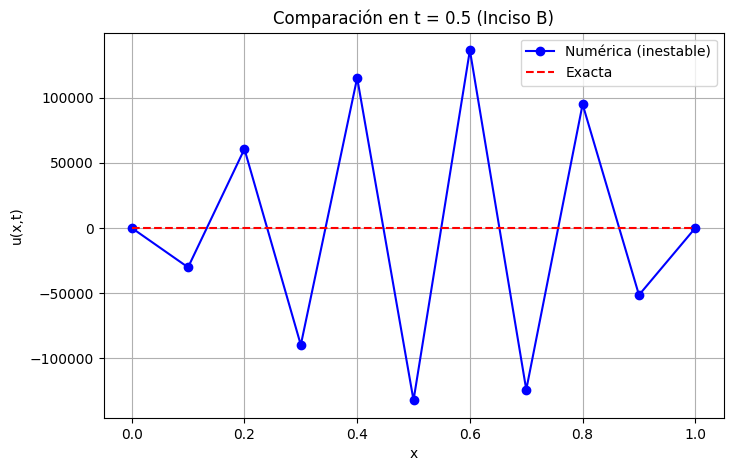

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parámetros del inciso B
h = 0.1         # paso espacial
k = 0.01        # paso temporal (grande -> inestable)
x = np.arange(0, 1 + h, h)
t_final = 0.5

# Número de estabilidad
r = k / h**2
print(f"Número de estabilidad r = {r} (si r > 0.5 el método es inestable)")

# Condición inicial
u = np.sin(np.pi * x)
u[0] = 0
u[-1] = 0

# Número de pasos de tiempo
n_steps = int(t_final / k)
print("Número de pasos de tiempo =", n_steps)

# Avance temporal (método explícito)
for n in range(n_steps):
    u_new = u.copy()
    for i in range(1, len(x)-1):
        u_new[i] = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])
    u = u_new.copy()

# Solución exacta
u_exact = np.exp(-np.pi**2 * t_final) * np.sin(np.pi * x)

# Crear DataFrame con resultados
data = {
    'x': x,
    'U_numérica (t=0.5)': u,
    'U_exacta (t=0.5)': u_exact,
    '|Error|': np.abs(u - u_exact)
}
tabla = pd.DataFrame(data)
pd.set_option('display.precision', 8)
print(tabla)

# Graficar comparación numérica vs exacta
plt.figure(figsize=(8,5))
plt.plot(x, u, 'o-', label='Numérica (inestable)', color='blue')
plt.plot(x, u_exact, 'r--', label='Exacta')
plt.title('Comparación en t = 0.5 (Inciso B)')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.grid(True)
plt.show()

***COMENTARIO:***
**El método se vuelve inestable, y los errores numéricos se amplifican en cada iteración, generando picos y oscilaciones que crecen con el tiempo.**
**Por lo tanto, las diferencias entre ambos casos se deben al criterio de estabilidad del método explícito y a la elección inadecuada de los pasos h y k.**